<a href="https://colab.research.google.com/github/ramyars466/ramyars-ml-task2/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1. Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. Load the dataset
df = pd.read_csv("Mall_Customers.csv")

# 3. Quick checks
print(df.head())
print(df.info())
print(df.describe())


   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


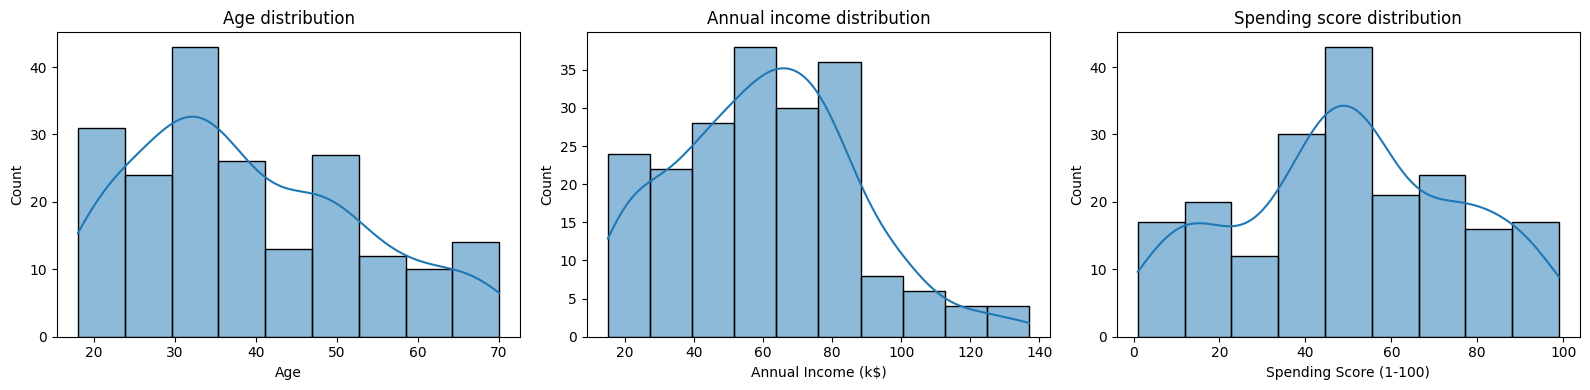

In [2]:
# Missing values check
print(df.isna().sum())

# Distributions of Age, Income, Spending Score
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(1, 3, figsize=(16, 4))

sns.histplot(df["Age"], kde=True, ax=axes[0])
axes[0].set_title("Age distribution")

sns.histplot(df["Annual Income (k$)"], kde=True, ax=axes[1])
axes[1].set_title("Annual income distribution")

sns.histplot(df["Spending Score (1-100)"], kde=True, ax=axes[2])
axes[2].set_title("Spending score distribution")

plt.tight_layout()
plt.show()


In [3]:
from sklearn.preprocessing import StandardScaler

# Select features
features = df[["Annual Income (k$)", "Spending Score (1-100)"]]

# Scale
scaler = StandardScaler()
X = scaler.fit_transform(features)

print("Shape of X:", X.shape)


Shape of X: (200, 2)


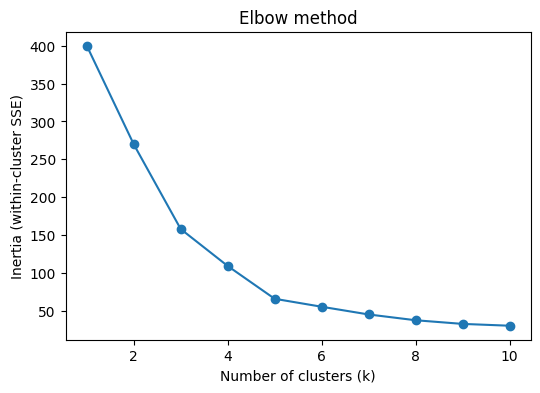

In [4]:
from sklearn.cluster import KMeans

inertias = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(K_range, inertias, marker="o")
plt.xlabel("Number of clusters (k)")
plt.ylabel("Inertia (within-cluster SSE)")
plt.title("Elbow method")
plt.show()


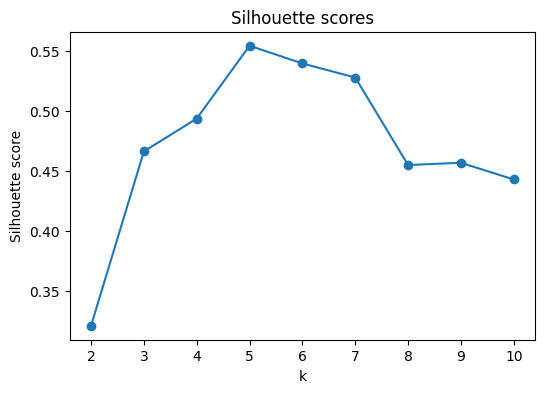

In [5]:
from sklearn.metrics import silhouette_score

sil_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X)
    sil = silhouette_score(X, labels)
    sil_scores.append(sil)

plt.figure(figsize=(6, 4))
plt.plot(K_range, sil_scores, marker="o")
plt.xlabel("k")
plt.ylabel("Silhouette score")
plt.title("Silhouette scores")
plt.show()


In [6]:
from sklearn.cluster import KMeans

optimal_k = 5   # from silhouette plot

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)     # X is the scaled feature matrix

# Add cluster labels back to original dataframe
df["Cluster"] = labels

df.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


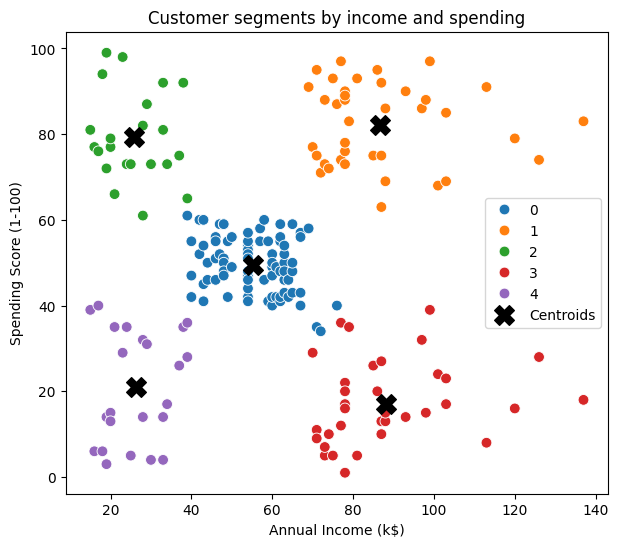

In [7]:
# Get centroids back to original income/spending scale
centroids_scaled = kmeans.cluster_centers_
centroids = scaler.inverse_transform(centroids_scaled)

plt.figure(figsize=(7, 6))
sns.scatterplot(
    x="Annual Income (k$)",
    y="Spending Score (1-100)",
    hue="Cluster",
    palette="tab10",
    data=df,
    s=60
)

# Plot centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=200, c="black", marker="X", label="Centroids"
)

plt.title("Customer segments by income and spending")
plt.legend()
plt.show()


In [8]:
cluster_summary = df.groupby("Cluster")[["Age", "Annual Income (k$)", "Spending Score (1-100)"]].mean()
cluster_counts = df["Cluster"].value_counts().sort_index()

cluster_summary["Count"] = cluster_counts
cluster_summary


,Age,Annual Income (k$),Spending Score (1-100),Count
Cluster,,,,
0,42.716049,55.296296,49.518519,81
1,32.692308,86.538462,82.128205,39
2,25.272727,25.727273,79.363636,22
3,41.114286,88.200000,17.114286,35
4,45.217391,26.304348,20.913043,23


In [9]:
df.to_csv("Mall_Customers_with_clusters.csv", index=False)


In [10]:
# Save final result (all customers with their cluster)
output_filename = "Mall_Customers_with_clusters.csv"
df.to_csv(output_filename, index=False)
print("Saved:", output_filename)


Saved: Mall_Customers_with_clusters.csv
